## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Importing required header files for the requirement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [2]:
stud_df = pd.read_csv('students-data.csv', sep=';')

In [3]:
stud_df.sample(25)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
348,GP,F,17,U,GT3,T,4,3,health,other,...,4,4,3,1,3,4,0,13,15,15
365,MS,M,18,R,GT3,T,1,3,at_home,other,...,3,3,4,2,4,3,4,10,10,10
346,GP,M,18,R,GT3,T,4,3,teacher,services,...,5,3,2,1,2,4,9,16,15,16
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,5,3,2,1,1,5,0,13,13,14
91,GP,F,15,U,GT3,T,4,3,services,other,...,4,5,5,1,3,1,4,16,17,18
221,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,3,4,1,1,5,0,6,5,0
61,GP,F,16,U,GT3,T,1,1,services,services,...,5,5,5,5,5,5,6,10,8,11
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,4,5,2,1,1,5,0,17,16,16
275,GP,F,17,U,LE3,T,2,2,services,other,...,4,4,4,2,3,5,6,12,12,12


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
stud_df.index.rename('number', inplace=True)

In [5]:
stud_df.sample(25)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
30,GP,M,15,U,GT3,T,4,4,health,services,...,5,4,2,3,4,5,0,9,11,12
73,GP,M,16,U,GT3,T,3,1,other,other,...,5,3,2,2,2,5,2,12,12,14
167,GP,F,16,U,GT3,T,4,2,health,services,...,4,2,3,1,1,3,0,14,15,16
284,GP,F,17,U,GT3,T,2,2,other,other,...,5,4,5,1,2,5,4,10,9,11
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
185,GP,M,17,U,GT3,T,3,3,services,services,...,4,3,4,2,3,4,12,12,12,11
149,GP,M,15,U,LE3,A,2,1,services,other,...,4,5,5,2,5,5,0,8,9,10
168,GP,F,16,U,GT3,T,2,2,other,other,...,5,1,5,1,1,4,0,6,7,0
325,GP,M,18,U,GT3,T,4,4,other,other,...,4,3,3,2,2,3,3,9,12,11


In [6]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

_No Null values in the Given dataset_ isna().sum() can be used to find the count of missing values

In [7]:
stud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [8]:
stud_df.select_dtypes(exclude='number').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
stud_df = stud_df.drop(stud_df.var()[stud_df.var() < 1].index.values, axis=1)

In [10]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [11]:
le = LabelEncoder()

for col in stud_df.select_dtypes(exclude='number').columns:
    stud_df[col] = le.fit_transform(stud_df[col])

stud_df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
303,0,0,17,1,0,1,3,2,1,1,...,1,1,0,2,2,5,0,17,17,18
334,0,0,18,0,0,1,2,2,0,2,...,1,0,0,4,1,4,0,10,9,0
293,0,0,17,0,1,1,3,1,3,2,...,1,0,0,2,1,3,6,18,18,18
25,0,0,16,1,0,1,2,2,3,3,...,1,1,0,2,3,5,14,6,9,8
43,0,1,15,1,0,1,2,2,3,3,...,1,1,0,1,1,1,0,8,8,11
150,0,1,18,1,1,1,1,1,2,2,...,0,1,1,5,5,4,0,6,5,0
134,0,1,15,0,0,1,3,4,0,4,...,1,0,1,3,1,5,0,9,0,0
140,0,1,15,1,0,1,4,3,4,3,...,1,1,0,2,1,3,0,7,9,0
352,1,1,18,1,1,1,1,3,0,3,...,0,1,1,3,3,3,7,8,7,8


In [12]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [13]:
stud_df_cp = stud_df.copy()
for v in ['G1','G2','G3']:
    stud_df[v]=np.where(stud_df[v]>=10,1,0)
    
stud_df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
75,0,1,15,1,0,1,4,3,4,2,...,1,1,0,3,3,5,6,0,0,1
285,0,1,17,1,0,1,1,1,2,2,...,1,1,0,3,2,4,2,1,1,1
120,0,0,15,1,0,1,1,2,0,3,...,1,1,0,3,2,1,2,1,1,1
91,0,0,15,1,0,1,4,3,3,2,...,1,1,0,5,3,1,4,1,1,1
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0


In [14]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int32
G2            395 non-null int32
G3            395 non-null int32
dtyp

The values G1, G2, G3 has been converted to int32 from int64 type, as seen in the above information.

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [15]:
X = stud_df.drop(labels='G3', axis=1)
y = stud_df[['G3']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int32
G2            395 non-null int32
dtypes: int32(19), int64(7)
memory us

In [16]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
G3    395 non-null int32
dtypes: int32(1)
memory usage: 1.6 KB


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

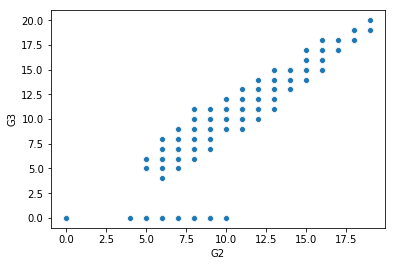

In [17]:
sns.scatterplot(x='G2', y='G3', data=stud_df_cp)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


### Inference:
* It is noted that the value of G3 can be found to be gradually increasing with increase in G2 value. The value of G2 plays a major role in predicting the Target G3

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

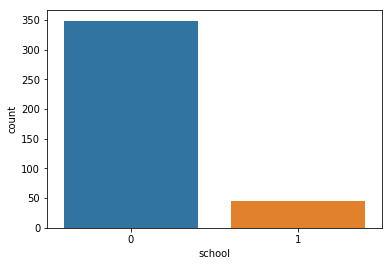

In [18]:
sns.countplot(x='school', data=stud_df_cp)

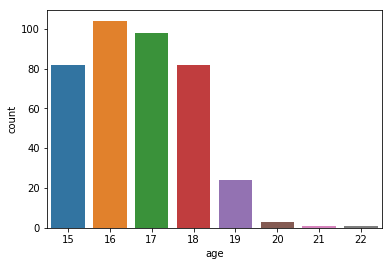

In [19]:
sns.countplot(x='age', data=stud_df_cp)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=6)

print(f'Size of Features for Training Data: {len(X_train)}')
print(f'Size of Target for Training Data: {len(y_train)}')
print(f'Size of Features for Test Data: {len(X_test)}')
print(f'Size of Target for Test Data: {len(y_test)}')

Size of Features for Training Data: 300
Size of Target for Training Data: 300
Size of Features for Test Data: 95
Size of Target for Test Data: 95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_predict = model.predict(X_test)

In [23]:
metrics.confusion_matrix(y_predict, y_test)

array([[29,  6],
       [ 2, 58]], dtype=int64)

In [24]:
y_Prob = model.predict_proba(X_train)
fpr, tpr, thr = metrics.roc_curve(y_train, y_Prob[::,1])
roc_auc = metrics.auc(fpr, tpr)

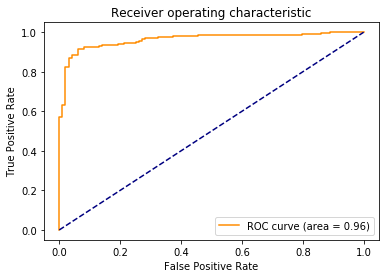

In [25]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [26]:
optF1 = 0
optTh = 0

for th in thr:
    preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
    f1Score = metrics.f1_score(y_train, preds)
    if(optF1 < f1Score):
        optF1 = f1Score
        optTh = th
print('Optimum threshold =', optTh)

Optimum threshold = 0.49149683915184966


In [27]:
# Train data metrics:
trainPreds = np.where(model.predict_proba(X_train)[:,1] > optTh, 1, 0)
trainAcc = metrics.accuracy_score(y_train, trainPreds)
trainF1 = metrics.f1_score(y_train, trainPreds)
optTrainRes=[X_train.shape[0], optTh, trainAcc, trainF1]

# Test Data metrics:
testPreds = np.where(model.predict_proba(X_test)[:,1] > optTh, 1, 0)
testAcc = metrics.accuracy_score(y_test, testPreds)
testF1 = metrics.f1_score(y_test, testPreds)
optTestRes=[X_test.shape[0], optTh, testAcc, testF1]

# Results:
res = pd.DataFrame(index=["dataSize", "optTh", "accuracy", "f1_score"])
res['Train_Metrics'] = optTrainRes
res['Test_Metrics'] = optTestRes

res

,Train_Metrics,Test_Metrics
dataSize,300.000000,95.000000
optTh,0.491497,0.491497
accuracy,0.920000,0.915789
f1_score,0.939086,0.935484


# Naive bayes with Iris data

### Import Iris.csv

In [28]:
iris_df = pd.read_csv('Iris.csv')

In [29]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [30]:
#Since there is no field name as Species, Considering Class as the dependent variable to be predicted.
X = iris_df.drop('Class', axis=1)
y = iris_df[['Class']]

### Find the distribution of target variable (Class)

In [31]:
iris_df.groupby(by='Class').count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

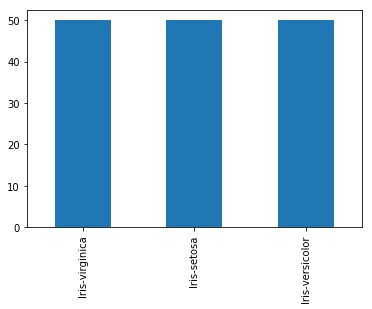

In [32]:
pd.value_counts(iris_df["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

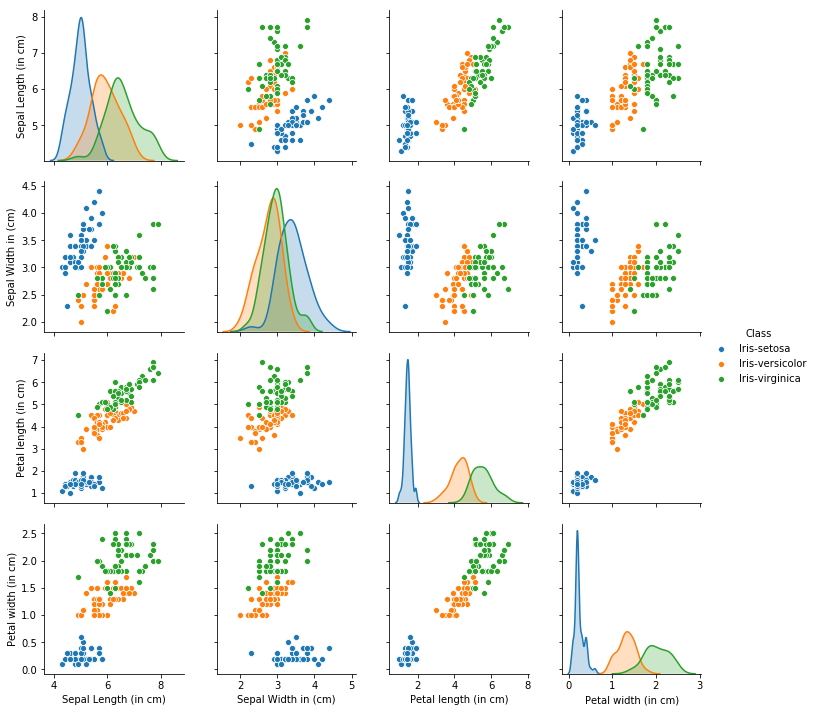

In [33]:
sns.pairplot(iris_df, hue="Class")

* The values are mostly skewed towards Right
* There is a linear distribution between petal length and petal width, Petal width, Petal length and petalLength and sepal Length, which indicates a strong correlations between the features.
* Petal length, Petal width, Sepal Length have a strong influence in predicting the Class variable


### Summary Statistics and explain insights for at least 2 variables

In [34]:
iris_df.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


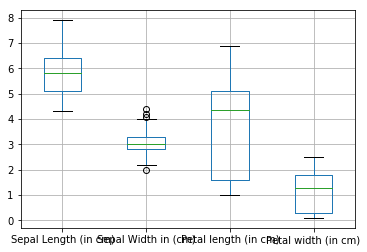

In [35]:
# To analyse the summary statistics we use the box plot as it provides more informations about the distribution and outliers.
iris_df.boxplot()

### Observations:
* Sepal Width: Mean and Median are close to each other and the distribution is almost symmetric with a bit of skew towards Right. It has low outliers as well as high outliers which indirectly indicates that the data is not even.
* Petal Length: Mean and Median are far from each other and the distribution is left skewed without any outliers.

### Correlation among all variables and give your insights

In [36]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


### Observations: 
We have already noted some strong correlations between the features from the pair plot. The correlation matrix further strengthens the previous observations.
1. We can observe that the correlation betweeb petal length and petal width is highest(96%)
2. The correlation between petal lentgh and sepal length remains at 87%.
3. The correlation between sepal length and petal width is around 81%.
> All the above mentioned variables remain as a strong factor in predicting the target variable Class. Heat map of the correlation is as follows

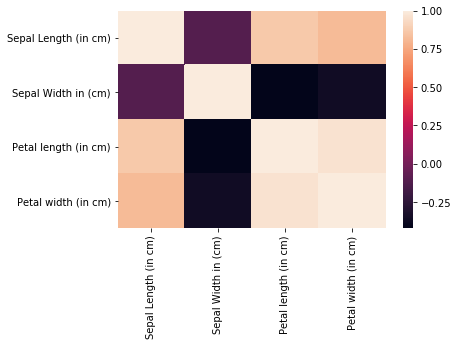

In [37]:
sns.heatmap(iris_df.corr())

### Split data in Training and Validation in 80:20

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Do Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in X_train.columns:
    X_train[[col]] = scaler.fit_transform(X_train[[col]])
    X_test[[col]] = scaler.fit_transform(X_test[[col]])

In [40]:
X_train.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,3.247402e-16,-8.544091e-16,8.511710e-17,5.551115e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.811810e+00,-2.437932e+00,-1.488515e+00,-1.379535e+00
25%,-8.665179e-01,-5.965357e-01,-1.210288e+00,-1.120670e+00
50%,-1.575487e-01,-1.361866e-01,2.643158e-01,1.736553e-01
75%,6.695820e-01,5.543371e-01,7.929475e-01,8.531760e-01
max,2.442005e+00,3.086257e+00,1.794565e+00,1.726846e+00


### Train and Fit NaiveBayes Model

In [41]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [42]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [43]:
y_predicted = model.predict(X_test)
print('The accuracy score on training data set is', model.score(X_train, y_train))
print('The accuracy score on testing data set is', model.score(X_test, y_test))

The accuracy score on training data set is 0.9833333333333333
The accuracy score on testing data set is 0.8666666666666667


In [44]:
# pd.DataFrame(metrics.confusion_matrix(y_predicted, y_test), columns=['ActClass0', 'ActClass1', 'ActClass2'], index=['PredClass0', 'Pred Class1', 'PredClass2'])
metrics.confusion_matrix(y_predicted, y_test)

array([[ 7,  0,  0],
       [ 0, 11,  3],
       [ 0,  1,  8]], dtype=int64)

Since this is a multi class variable prediction we cannot use ROC curve analysis and hence unable to predict the optimal threshold and F1 score.

### Observations:
From the confusion matrix we can arrive at a result that Our model has precited the wrong outcomes at 4 instances.
* 3 times The outcome was predicted to be Class2, but in reality it was Class1.
* The outcome was predicted to be class1 Once, when it was actually Class2.
* Overall accuracy for Test data is 86%
* Accuracy for Train data set is 98%